In [32]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
INPUT_SIZE = 30
LR = 0.1
N_CLASSES = 3

p = np.array([[-1,1,1,1,-1,\
1,-1,-1,-1,1,\
1,-1,-1,-1,1,\
1,-1,-1,-1,1,\
1,-1,-1,-1,1,\
-1,1,1,1,-1],
[-1,1,1,-1,-1,\
-1,-1,1,-1,-1,\
-1,-1,1,-1,-1,\
-1,-1,1,-1,-1,\
-1,-1,1,-1,-1,\
-1,-1,1,-1,-1],
[1,1,1,-1,-1,\
-1,-1,-1,1,-1,\
-1,-1,-1,1,-1,\
-1,1,1,-1,-1,\
-1,1,-1,-1,-1,\
-1,1,1,1,1]])
labels = [[1, 0, 0], 
             [0, 1, 0], 
             [0, 0, 1]]
X = tf.placeholder(tf.float32, [None, INPUT_SIZE])
Y = tf.placeholder(tf.float32, [None, N_CLASSES])

W = tf.Variable(tf.random_normal([INPUT_SIZE, N_CLASSES]))
b = tf.Variable(tf.random_normal([N_CLASSES]))

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=LR).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

print('Learning stared. It takes sometime.')
for step in range(10001):
    cost_val, _ = sess.run([cost, optimizer], feed_dict={X: p, Y: labels})
    if step % 200 == 0:
           print(step, cost_val)

correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={X: p, Y: labels}))

Learning stared. It takes sometime.
(0, 2.073753)
(200, 0.0027522093)
(400, 0.001435751)
(600, 0.0009716793)
(800, 0.00073436607)
(1000, 0.00059026404)
(1200, 0.00049339264)
(1400, 0.00042384118)
(1600, 0.0003715467)
(1800, 0.00033072275)
(2000, 0.00029788984)
(2200, 0.00027105995)
(2400, 0.00024868237)
(2600, 0.00022968375)
(2800, 0.00021340797)
(3000, 0.00019925881)
(3200, 0.00018685858)
(3400, 0.00017592905)
(3600, 0.00016623165)
(3800, 0.00015752793)
(4000, 0.00014973836)
(4200, 0.00014258473)
(4400, 0.00013614651)
(4600, 0.00013026471)
(4800, 0.00012485986)
(5000, 0.00011989218)
(5200, 0.00011528219)
(5400, 0.00011102991)
(5600, 0.00010705582)
(5800, 0.000103399674)
(6000, 9.994224e-05)
(6200, 9.676301e-05)
(6400, 9.374274e-05)
(6600, 9.0881455e-05)
(6800, 8.825861e-05)
(7000, 8.5715255e-05)
(7200, 8.333085e-05)
(7400, 8.110543e-05)
(7600, 7.8959485e-05)
(7800, 7.693277e-05)
(8000, 7.498553e-05)
(8200, 7.319725e-05)
(8400, 7.144872e-05)
(8600, 6.985915e-05)
(8800, 6.822984e-05)
(9

('Label:', array([2]))
('Prediction:', array([2]))


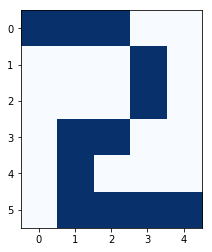

In [38]:
import random
r = random.randint(0,  2)
print("Label:", sess.run(tf.argmax(labels[r:r+1], 1)))
print("Prediction:", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: p[r:r + 1]}))

plt.imshow(p[r:r + 1].reshape(6, 5), cmap='Blues', interpolation='nearest')
plt.show()